In [1]:
import numpy as np
import pandas as pd

X = [[1500,158900],[1700,169850],[1750,178950],[1800,178650],[1820,180000],[1920,186850],[1450,150000],
[1590,149870],[1596,158620],[1623,159990],[1878,189680],[1658,168980],[1720,170000],[1985,190000],[2000,198510],[2100,200000],
[2050,193580],[1990,200000],[1965,195180],[1970,198680],[2120,201650],[2200,220000],
[2156,216510],[1269,138550],[1489,149850],[1785,179850],[1965,196280],[1948,195680],
[2008,200000],[2079,205880],[2116,210000],[2230,220000],[2200,219850],[2220,222000],[2365,235680],[2325,239580],
[2396,240000],[2489,248850],[2420,245590],[2398,240000],[2350,236840],[2375,230000],[2236,226260],[2347,220590],[2459,239840]]
df = pd.DataFrame(X,columns=['House area sq ft','Price'])
print(df.head(3))



   House area sq ft   Price
0              1500  158900
1              1700  169850
2              1750  178950


In [2]:
from sklearn.model_selection import train_test_split
y = np.array(df['Price'])
y= y.reshape((y.shape[0],1))
x = np.array(df.drop('Price',axis=1))
X = x
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)

(36, 1) (36, 1)


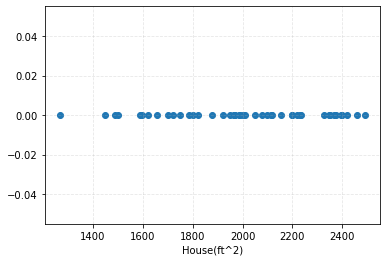

In [3]:
import matplotlib.pyplot as plt
samples = X.shape[0]
zero_axis = np.zeros(samples)
fg, ax = plt.subplots(1,1)

ax.scatter(X,zero_axis)
ax.grid(linestyle='--', alpha=0.3)
plt.xlabel('House(ft^2)')
plt.show()

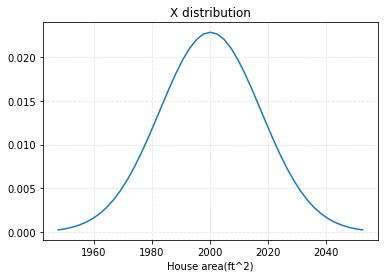

In [4]:
import scipy.stats as stats
import math
mean = np.mean(X)
variance = np.std(X)
std = math.sqrt(variance) # standard deviation formula
samples=X.shape[0]
# generating samples of X up to 3 std
data = np.linspace(mean - 3*std, mean + 3*std, samples) 
fg, ax = plt.subplots(1,1)
pdf = stats.norm.pdf(data, mean, std)
ax.plot(data, pdf)
# ax.hist(stats.norm.pdf(data, mean, std))
ax.grid(linestyle='--', alpha=0.3)
plt.xlabel('House area(ft^2)')
plt.title("X distribution")
plt.show()

# MLE theory

$$
\Large P(Y| X ; \theta) 
$$

$$
\Large P(Y| X ; \theta) = \prod_{i=1}^{n}P(y_i| x_i ; \theta)
$$

<!-- $$
\Large f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(Y-\mu)^2}{2\sigma^2}}
$$ -->

$$\Large \theta_{MLE} = argmax\prod_{i=1}^{n}P(y_i|x_i\theta, \sigma^2)$$

$$\Large \theta_{MLE} = argmax\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i-x_i\theta)^2}{2\sigma^2}}$$

<!-- $$
\Large P(Y|X\theta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(Y-x_i\theta)^2}{2\sigma^2}}
$$ -->

$$\Large \theta_{MLE} = argmin\sum_{i=1}^{n}-\log(P(y_i|x_i; \theta, \sigma^2))$$

$$\Large \theta_{MLE} = - \sum_{i=1}^n - \log\left( \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i-x_i\theta)^2}{2\sigma^2}}\right)$$

$$\Large \theta_{MLE} = - \sum_{i=1}^n - \log\left( \frac{1}{\sqrt{2\pi\sigma^2}}\right)-\frac{(y_i-x_i\theta)^2}{2\sigma^2}$$

$$\Large J(\theta_{MLE}) = - \sum_{i=1}^n - \log\left( \frac{1}{\sqrt{2\pi\sigma^2}}\right)-\frac{(y_i-x_i\theta)^2}{2\sigma^2}$$


$$\Large \Delta J(\theta_{MLE}) = - 2*\sum_{i=1}^n -\frac{(y_i-x_i\theta)^2}{2\sigma^2}*x_i*\frac{1}{2\sigma^2}$$


$$\Large \Delta J(\theta_{MLE}) = - 2n*\frac{1}{2\sigma^2 * 2\sigma^2}*\sum_{i=1}^n -\frac{(y_i-x_i\theta)^2}{1}*x_i$$


In [5]:
df.head()

,House area sq ft,Price
0,1500,158900
1,1700,169850
2,1750,178950
3,1800,178650
4,1820,180000


In [6]:
df_model = df.copy()
df_model['c'] = 1

In [7]:
# np.random.seed(10)
theta = [np.random.rand(), np.random.rand()]

In [8]:
theta

[0.8829759164834261, 0.7393485177950916]

In [9]:
x_temp = np.array([[2, 1], [3, 1]])
t_temp = np.array([2, 3])
np.matmul(x_temp, t_temp.T)

array([7, 9])

In [10]:
X = np.array(X)
t_temp = np.array([2, 3])
print(X)
np.matmul(X, t_temp.T)

[[1500]
 [1700]
 [1750]
 [1800]
 [1820]
 [1920]
 [1450]
 [1590]
 [1596]
 [1623]
 [1878]
 [1658]
 [1720]
 [1985]
 [2000]
 [2100]
 [2050]
 [1990]
 [1965]
 [1970]
 [2120]
 [2200]
 [2156]
 [1269]
 [1489]
 [1785]
 [1965]
 [1948]
 [2008]
 [2079]
 [2116]
 [2230]
 [2200]
 [2220]
 [2365]
 [2325]
 [2396]
 [2489]
 [2420]
 [2398]
 [2350]
 [2375]
 [2236]
 [2347]
 [2459]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [ ]:
Y = np.array(Y)

In [ ]:
Y - np.matmul(X, t_temp.T)

In [ ]:
x_temp

In [ ]:
X, Y

In [ ]:
df_model.head()

In [12]:
df_model_std = df_model.copy()
for c in df_model_std.columns:
    if c == 'c':
        continue
    mu, sig = np.mean(df_model_std[c]), np.std(df_model_std[c])
    print(c, mu, sig)
    df_model_std[c] = (df_model_std[c] - mu) / sig

House area sq ft 2000.2222222222222 305.045562271816
Price 199013.77777777778 29352.07395957558


In [13]:
df_model_std.head()

,House area sq ft,Price,c
0,-1.639828,-1.366642,1
1,-0.984188,-0.993585,1
2,-0.820278,-0.683556,1
3,-0.656368,-0.693776,1
4,-0.590804,-0.647783,1


In [28]:

X = df_model_std[['House area sq ft', 'c']].values
Y = df_model_std['Price'].values
print(X, Y)



[[-1.63982789e+00  1.00000000e+00]
 [-9.84188132e-01  1.00000000e+00]
 [-8.20278192e-01  1.00000000e+00]
 [-6.56368251e-01  1.00000000e+00]
 [-5.90804275e-01  1.00000000e+00]
 [-2.62984394e-01  1.00000000e+00]
 [-1.80373784e+00  1.00000000e+00]
 [-1.34479000e+00  1.00000000e+00]
 [-1.32512081e+00  1.00000000e+00]
 [-1.23660944e+00  1.00000000e+00]
 [-4.00668744e-01  1.00000000e+00]
 [-1.12187248e+00  1.00000000e+00]
 [-9.18624156e-01  1.00000000e+00]
 [-4.99014708e-02  1.00000000e+00]
 [-7.28488625e-04  1.00000000e+00]
 [ 3.27091393e-01  1.00000000e+00]
 [ 1.63181452e-01  1.00000000e+00]
 [-3.35104768e-02  1.00000000e+00]
 [-1.15465447e-01  1.00000000e+00]
 [-9.90744530e-02  1.00000000e+00]
 [ 3.92655369e-01  1.00000000e+00]
 [ 6.54911274e-01  1.00000000e+00]
 [ 5.10670526e-01  1.00000000e+00]
 [-2.39709182e+00  1.00000000e+00]
 [-1.67588808e+00  1.00000000e+00]
 [-7.05541233e-01  1.00000000e+00]
 [-1.15465447e-01  1.00000000e+00]
 [-1.71194827e-01  1.00000000e+00]
 [ 2.54971019e-02  1

In [29]:
# X = df_model[['House area sq ft', 'c']].values
# Y = df_model['Price'].values
# print(X, Y)


In [39]:
learning_rate = 0.1
iters = 2000
# np.random.seed(10)
# x = [np.random.rand() for _ in range(10)]
# t_temp = np.array([np.random.rand(), np.random.rand()])
t_temp = np.array([1, 2])
delta_t = np.array([0, 0])
n = len(Y)
err_prev = -np.inf
result = None
iter_rows = []
for it in range(iters):
    err = Y - np.matmul(X, t_temp.T)
#     delta_t =  err * 2/ n 
    delta_t =  -2/n * np.matmul(X.T, err)
    print(it, np.round(np.sum(err), 4), t_temp, delta_t, X.shape, delta_t.shape)
    t_temp = t_temp - learning_rate* delta_t.T
    iter_row = {
        'ix': it,
        'err': np.round(np.sum(err), 4),
        't_temp': t_temp,
        'delta_t': delta_t
        
    }
    iter_rows.append(iter_row)
    if np.abs(err_prev - np.sum(err)) < 0.000001:
        result = t_temp
        print(t_temp)
        break
    err_prev = np.sum(err)
df_iter = pd.DataFrame(iter_rows)    

0 -90.0 [1 2] [0.02716037 4.        ] (45, 2) (2,)
1 -72.0 [0.99728396 1.6       ] [0.0217283 3.2      ] (45, 2) (2,)
2 -57.6 [0.99511113 1.28      ] [0.01738264 2.56      ] (45, 2) (2,)
3 -46.08 [0.99337287 1.024     ] [0.01390611 2.048     ] (45, 2) (2,)
4 -36.864 [0.99198226 0.8192    ] [0.01112489 1.6384    ] (45, 2) (2,)
5 -29.4912 [0.99086977 0.65536   ] [0.00889991 1.31072   ] (45, 2) (2,)
6 -23.593 [0.98997978 0.524288  ] [0.00711993 1.048576  ] (45, 2) (2,)
7 -18.8744 [0.98926778 0.4194304 ] [0.00569594 0.8388608 ] (45, 2) (2,)
8 -15.0995 [0.98869819 0.33554432] [0.00455675 0.67108864] (45, 2) (2,)
9 -12.0796 [0.98824252 0.26843546] [0.0036454  0.53687091] (45, 2) (2,)
10 -9.6637 [0.98787797 0.21474836] [0.00291632 0.42949673] (45, 2) (2,)
11 -7.7309 [0.98758634 0.17179869] [0.00233306 0.34359738] (45, 2) (2,)
12 -6.1848 [0.98735304 0.13743895] [0.00186645 0.27487791] (45, 2) (2,)
13 -4.9478 [0.98716639 0.10995116] [0.00149316 0.21990233] (45, 2) (2,)
14 -3.9582 [0.98701708 0.

In [42]:
df_iter.head()

,ix,err,t_temp,delta_t
0,0,-90.000,"[0.9972839626415493, 1.6]","[0.027160373584507527, 4.0]"
1,1,-72.000,"[0.9951111327547887, 1.28]","[0.021728298867605883, 3.2]"
2,2,-57.600,"[0.9933728688453802, 1.024]","[0.017382639094084745, 2.5600000000000005]"
3,3,-46.080,"[0.9919822577178534, 0.8191999999999999]","[0.013906111275267734, 2.0480000000000005]"
4,4,-36.864,"[0.990869768815832, 0.6553599999999999]","[0.011124889020214109, 1.6384000000000003]"


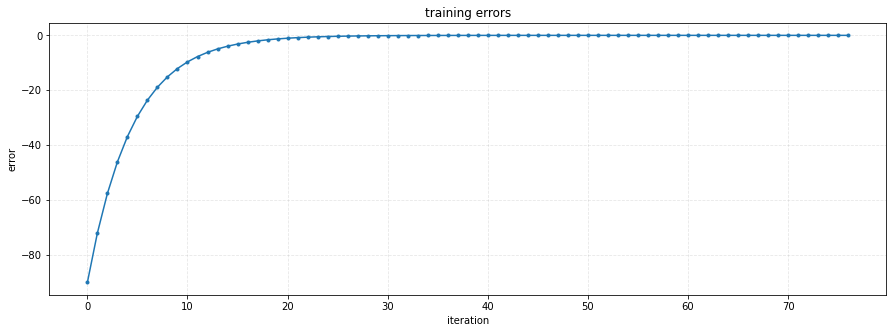

In [49]:
fg, ax = plt.subplots(1,1)
ax.plot(df_iter['ix'], df_iter['err'], marker='.')

_ = ax.grid(linestyle='--', alpha=0.3)
_ = ax.set_xlabel('iteration')
_ = ax.set_ylabel('error')
ax.set_title('training errors')
fg.set_size_inches(15, 5)


In [31]:
y_hat = np.matmul(X, result.T)

In [32]:
y_hat

array([-1.61755866e+00, -9.70822605e-01, -8.09138592e-01, -6.47454579e-01,
       -5.82780974e-01, -2.59412948e-01, -1.77924267e+00, -1.32652743e+00,
       -1.30712535e+00, -1.21981599e+00, -3.95227519e-01, -1.10663718e+00,
       -9.06149000e-01, -4.92237305e-02, -7.18526596e-04,  3.22649500e-01,
        1.60965486e-01, -3.30553292e-02, -1.13897336e-01, -9.77289345e-02,
        3.87323105e-01,  6.46017526e-01,  5.03735594e-01, -2.36453880e+00,
       -1.65312914e+00, -6.95959783e-01, -1.13897336e-01, -1.68869900e-01,
        2.51509155e-02,  2.54742214e-01,  3.74388384e-01,  7.43027934e-01,
        6.46017526e-01,  7.10691131e-01,  1.17957477e+00,  1.05022756e+00,
        1.27981886e+00,  1.58055112e+00,  1.35742718e+00,  1.28628622e+00,
        1.13106957e+00,  1.21191157e+00,  7.62430015e-01,  1.12136852e+00,
        1.48354071e+00])

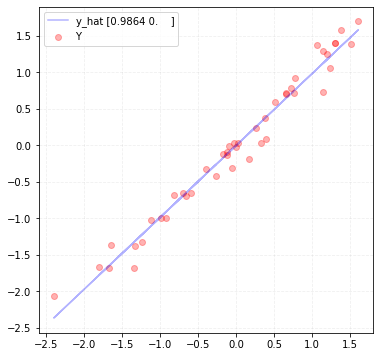

In [52]:
fg, ax = plt.subplots(1,1)
# ax.scatter(df_model_std['House area sq ft'], y_hat, color='blue', alpha=0.3, label='$\hat{y}$')
ax.plot(df_model_std['House area sq ft'], y_hat, color='blue', alpha=0.3, label=f'y_hat {np.round(result,4)}')
ax.scatter(df_model_std['House area sq ft'], Y, color='red', alpha=0.3, label='Y')
ax.grid(linestyle='--', alpha=0.2)
ax.legend()
fg.set_size_inches(6, 6)

In [53]:
!ls

Salary_Data.csv Untitled.ipynb


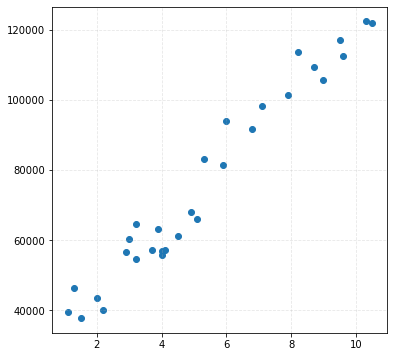

In [59]:
df2 = pd.read_csv('Salary_Data.csv')
df_model2 = df2.copy()
fg, ax = plt.subplots(1,1)
_ = ax.scatter(df2['YearsExperience'], df2['Salary'])
ax.grid(linestyle='--', alpha=0.3)
# ax.legend()
fg.set_size_inches(6, 6)

In [60]:
def standardize(df):
    df_tmp = df.copy()
    for c in df_tmp.columns:
        
        mu, sig = np.mean(df_tmp[c]), np.std(df_tmp[c])
        if sig == 0:
            continue
        #         print(c, mu, sig)
        df_tmp[c] = (df_tmp[c] - mu) / sig        
    return df_tmp

In [71]:
df2['c'] = 1
df2_std = standardize(df2)

In [72]:
df2_std.head()

,YearsExperience,Salary,c
0,-1.510053,-1.360113,1
1,-1.438373,-1.105527,1
2,-1.366693,-1.419919,1
3,-1.187494,-1.204957,1
4,-1.115814,-1.339781,1


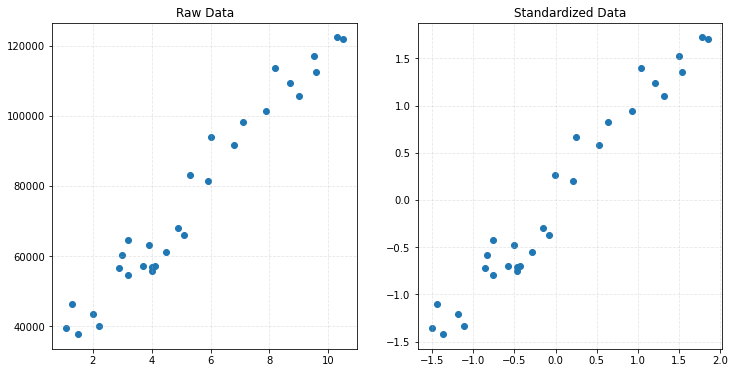

In [73]:
fg, ax = plt.subplots(1,2)
_ = ax[0].scatter(df2['YearsExperience'], df2['Salary'])
_ = ax[0].set_title('Raw Data')
_ = ax[1].scatter(df2_std['YearsExperience'], df2_std['Salary'])
_ = ax[1].set_title('Standardized Data')
for a in ax:
    a.grid(linestyle='--', alpha=0.3)
# ax.legend()
fg.set_size_inches(12, 6)

In [74]:

X = df2_std[['YearsExperience', 'c']].values
Y = df2_std['Salary'].values
print(X, Y)



[[-1.51005294  1.        ]
 [-1.43837321  1.        ]
 [-1.36669348  1.        ]
 [-1.18749416  1.        ]
 [-1.11581443  1.        ]
 [-0.86493538  1.        ]
 [-0.82909552  1.        ]
 [-0.75741579  1.        ]
 [-0.75741579  1.        ]
 [-0.57821647  1.        ]
 [-0.50653674  1.        ]
 [-0.47069688  1.        ]
 [-0.47069688  1.        ]
 [-0.43485702  1.        ]
 [-0.29149756  1.        ]
 [-0.1481381   1.        ]
 [-0.07645838  1.        ]
 [-0.00477865  1.        ]
 [ 0.21026054  1.        ]
 [ 0.2461004   1.        ]
 [ 0.53281931  1.        ]
 [ 0.6403389   1.        ]
 [ 0.92705781  1.        ]
 [ 1.03457741  1.        ]
 [ 1.21377673  1.        ]
 [ 1.32129632  1.        ]
 [ 1.50049564  1.        ]
 [ 1.5363355   1.        ]
 [ 1.78721455  1.        ]
 [ 1.85889428  1.        ]] [-1.36011263 -1.10552744 -1.419919   -1.20495739 -1.33978143 -0.71830716
 -0.58815781 -0.79981746 -0.42881019 -0.69801306 -0.47433279 -0.74976858
 -0.70662043 -0.70201994 -0.55250402 -0.299

In [75]:

learning_rate = 0.1
iters = 2000
# np.random.seed(10)
# x = [np.random.rand() for _ in range(10)]
# t_temp = np.array([np.random.rand(), np.random.rand()])
t_temp = np.array([1, 2])
delta_t = np.array([0, 0])
n = len(Y)
err_prev = -np.inf
result = None
iter_rows = []
for it in range(iters):
    err = Y - np.matmul(X, t_temp.T)
#     delta_t =  err * 2/ n 
    delta_t =  -2/n * np.matmul(X.T, err)
    print(it, np.round(np.sum(err), 4), t_temp, delta_t, X.shape, delta_t.shape)
    t_temp = t_temp - learning_rate* delta_t.T
    iter_row = {
        'ix': it,
        'err': np.round(np.sum(err), 4),
        't_temp': t_temp,
        'delta_t': delta_t

    }
    iter_rows.append(iter_row)
    if np.abs(err_prev - np.sum(err)) < 0.000001:
        result = t_temp
        print(t_temp)
        break
    err_prev = np.sum(err)
df_iter = pd.DataFrame(iter_rows)    

0 -60.0 [1 2] [0.04351676 4.        ] (30, 2) (2,)
1 -48.0 [0.99564832 1.6       ] [0.03481341 3.2       ] (30, 2) (2,)
2 -38.4 [0.99216698 1.28      ] [0.02785073 2.56      ] (30, 2) (2,)
3 -30.72 [0.98938191 1.024     ] [0.02228058 2.048     ] (30, 2) (2,)
4 -24.576 [0.98715385 0.8192    ] [0.01782447 1.6384    ] (30, 2) (2,)
5 -19.6608 [0.9853714 0.65536  ] [0.01425957 1.31072   ] (30, 2) (2,)
6 -15.7286 [0.98394545 0.524288  ] [0.01140766 1.048576  ] (30, 2) (2,)
7 -12.5829 [0.98280468 0.4194304 ] [0.00912613 0.8388608 ] (30, 2) (2,)
8 -10.0663 [0.98189207 0.33554432] [0.0073009  0.67108864] (30, 2) (2,)
9 -8.0531 [0.98116198 0.26843546] [0.00584072 0.53687091] (30, 2) (2,)
10 -6.4425 [0.98057791 0.21474836] [0.00467258 0.42949673] (30, 2) (2,)
11 -5.154 [0.98011065 0.17179869] [0.00373806 0.34359738] (30, 2) (2,)
12 -4.1232 [0.97973684 0.13743895] [0.00299045 0.27487791] (30, 2) (2,)
13 -3.2985 [0.9794378  0.10995116] [0.00239236 0.21990233] (30, 2) (2,)
14 -2.6388 [0.97919856 0.0

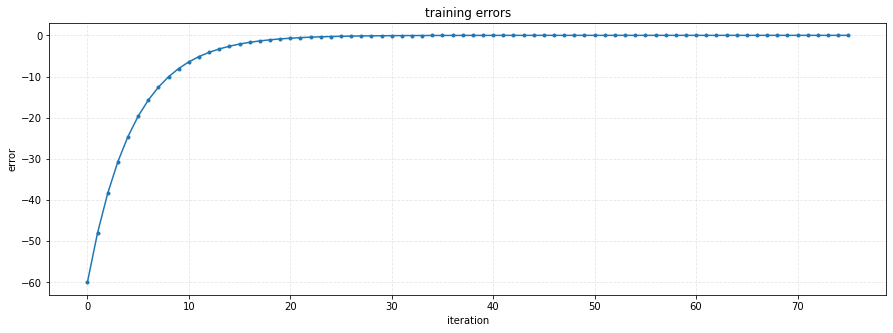

In [76]:
fg, ax = plt.subplots(1,1)
ax.plot(df_iter['ix'], df_iter['err'], marker='.')

_ = ax.grid(linestyle='--', alpha=0.3)
_ = ax.set_xlabel('iteration')
_ = ax.set_ylabel('error')
ax.set_title('training errors')
fg.set_size_inches(15, 5)


In [77]:
y_hat = np.matmul(X, result.T)

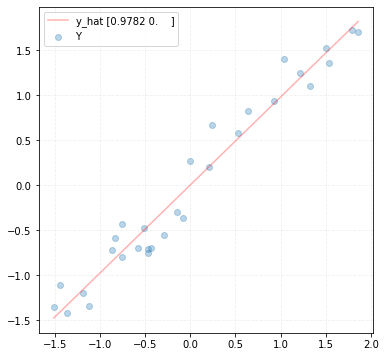

In [80]:
fg, ax = plt.subplots(1,1)
# ax.scatter(df_model_std['House area sq ft'], y_hat, color='blue', alpha=0.3, label='$\hat{y}$')
ax.scatter(df2_std['YearsExperience'], Y, alpha=0.3, label='Y')
ax.plot(df2_std['YearsExperience'], y_hat, color='red', alpha=0.3, label=f'y_hat {np.round(result,4)}')
ax.grid(linestyle='--', alpha=0.2)
ax.legend()
fg.set_size_inches(6, 6)

BREAKING: theta is = [9.86419828e-01 1.05915019e-06]
0.12566820371879367 0.6777019033721661 0.16424357555873023


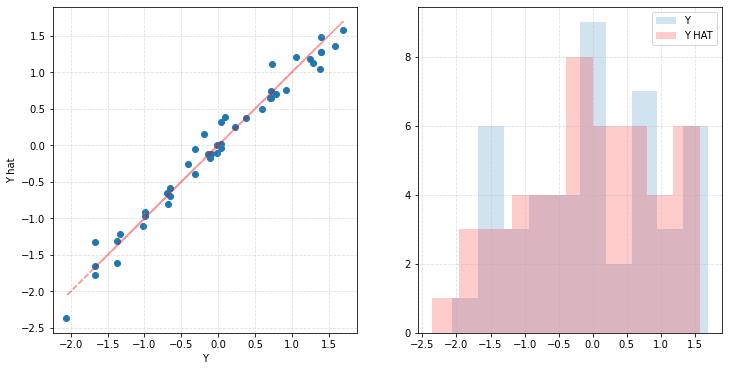

In [193]:

X = df_model_std[['House area sq ft', 'c']].values
Y = df_model_std['Price'].values
# print(X, Y)

lrmle = LinearRegMLE()
result, df_iter = lrmle.estimate(Y, X, learning_rate=0.01, quiet=True)
y_hat = lrmle.pred(X, result)

print(lrmle.mae(Y, y_hat), lrmle.mape(Y, y_hat), lrmle.rmse(Y, y_hat))
lrmle.plot_result(Y, y_hat)

In [198]:
Y_raw = df_model['Price']
Y_raw_mean = np.mean(df_model['Price'])
Y_raw_std = np.std(df_model['Price'])
y_hat_adj = y_hat*Y_raw_std + Y_raw_mean

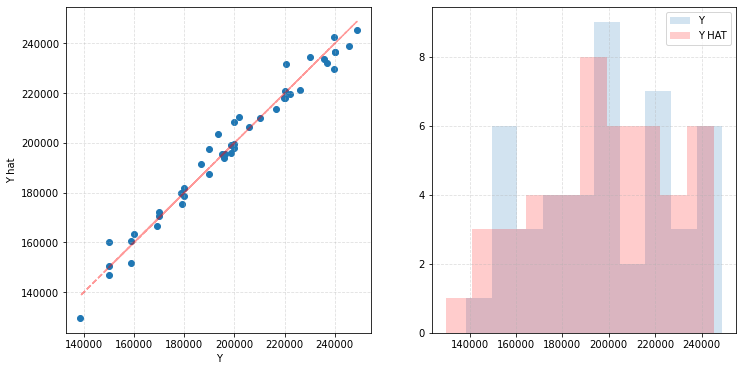

In [199]:
lrmle.plot_result(Y_raw, y_hat_adj)

In [200]:
df_temp = pd.DataFrame(
    {
        'Y': Y_raw,
        'y_hat': y_hat_adj
    }
)

In [205]:
mean_absolute_percentage_error(Y_raw, y_hat_adj)

0.01909044196291587

In [211]:
df_temp['diff'] = df_temp['Y'] - df_temp['y_hat']
df_temp['abs_diff'] = np.abs(df_temp['diff'])
df_temp['pe_abs_diff'] = df_temp['abs_diff']*1.0/df_temp['Y']
print(f"MAE {np.round(np.mean(df_temp['abs_diff']),2):,}, MAPE={np.round(np.mean(df_temp['pe_abs_diff']),4):.2%}") 
# df_temp.head(1000)

MAE 3,688.62, MAPE=1.91%


In [196]:
# from sklearn.metrics import mean_absolute_percentage_error

In [197]:
# mean_absolute_percentage_error(Y, y_hat)

In [245]:
class LinearRegMLE():
    def __init__(self):
        self.learning_rate = 0.1
        self.iters = 2000
    
    def pred(self, X, theta):
        return np.matmul(X, theta.T)
    
    def estimate(self, Y, X, learning_rate=None, iters=None, quiet=True):
        learning_rate = learning_rate or self.learning_rate
        iters = iters or self.iters
#         print(learning_rate, iters)
        theta = np.ones(len(X[0]))
        delta_t = np.zeros(len(X[0]))
        n = len(Y)
        
        err_prev = -np.inf
        
        result = None
        iter_rows = []
        break_flag = False
        for it in range(iters):
            if break_flag:
                break
            err = Y - np.matmul(X, theta.T)
            delta_t =  -2/n * np.matmul(X.T, err)

            theta = theta - learning_rate* delta_t.T
            if not quiet:
                print(it, np.round(np.sum(err), 4), theta, delta_t, X.shape, delta_t.shape)

            iter_row = {
                'ix': it,
                'err': np.round(np.sum(err), 4),
                't_temp': theta,
                'delta_t': delta_t

            }
            iter_rows.append(iter_row)
            if np.abs(err_prev - np.sum(err)) < 0.000001:
                result = theta
                print('BREAKING: theta is =', theta)
                break_flag = True
            err_prev = np.sum(err)
            self.df_iter = pd.DataFrame(iter_rows)    
        return result, self.df_iter
    def standardize(self, df):
        df_tmp = df.copy()
        for c in df_tmp.columns:

            mu, sig = np.mean(df_tmp[c]), np.std(df_tmp[c])
            if sig == 0:
                continue
            #         print(c, mu, sig)
            df_tmp[c] = (df_tmp[c] - mu) / sig        
        return df_tmp
    def mae(self, y, y_hat):
        return np.mean(np.abs(y - y_hat))
    
    def mape(self, y, y_hat):
        return np.mean(np.abs(y_hat/y-1))
    def rmse(self, y, y_hat):
        return np.sqrt(np.mean(np.power(y-y_hat,2)))

    def plot_result(self, Y, y_hat):
        fg, ax = plt.subplots(1,2)
        ax[0].scatter(Y, y_hat)
        ax[0].plot(Y, Y, label='Y-Y', color='red', linestyle='--', alpha=0.4)

        ax[0].set_xlabel('Y')
        ax[0].set_ylabel('Y hat')
        ax[0].grid(linestyle='--', alpha=0.4)
        ax[1].hist(Y,  alpha=0.2, label='Y')
        ax[1].hist(y_hat, color='red', alpha=0.2, label='Y HAT')
        ax[1].legend()
        ax[1].grid(linestyle='--', alpha=0.4)
        fg.set_size_inches(6*2,6)

In [213]:
lrmle = LinearRegMLE()


In [214]:
!ls

50_Startups.csv                     MLE_files
Date-Wise-Prices-all-Commodity.xlsx Salary_Data.csv
MLE.htm                             Untitled.ipynb


In [215]:
df50 = pd.read_csv('50_Startups.csv')

In [216]:
df50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [217]:
df50['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [218]:
df50['is_NY'] = (df50['State'] == 'New York')*1
df50['is_CA'] = (df50['State'] == 'California')*1

In [219]:
df50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,is_NY,is_CA
0,165349.20,136897.80,471784.10,New York,192261.83,1,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0
3,144372.41,118671.85,383199.62,New York,182901.99,1,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0


In [220]:
df50_model = df50[['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA', 'Profit']].copy()

In [221]:
df50_model.head()

,R&D Spend,Administration,Marketing Spend,is_NY,is_CA,Profit
0,165349.20,136897.80,471784.10,1,0,192261.83
1,162597.70,151377.59,443898.53,0,1,191792.06
2,153441.51,101145.55,407934.54,0,0,191050.39
3,144372.41,118671.85,383199.62,1,0,182901.99
4,142107.34,91391.77,366168.42,0,0,166187.94


In [222]:
df50_model_std = lrmle.standardize(df50_model)

In [223]:
df50_model_std.head()

,R&D Spend,Administration,Marketing Spend,is_NY,is_CA,Profit
0,2.016411,0.560753,2.153943,1.393261,-0.717741,2.011203
1,1.955860,1.082807,1.923600,-0.717741,1.393261,1.999430
2,1.754364,-0.728257,1.626528,-0.717741,-0.717741,1.980842
3,1.554784,-0.096365,1.422210,1.393261,-0.717741,1.776627
4,1.504937,-1.079919,1.281528,-0.717741,-0.717741,1.357740


In [224]:
df50_model_std.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA',
       'Profit'],
      dtype='object')

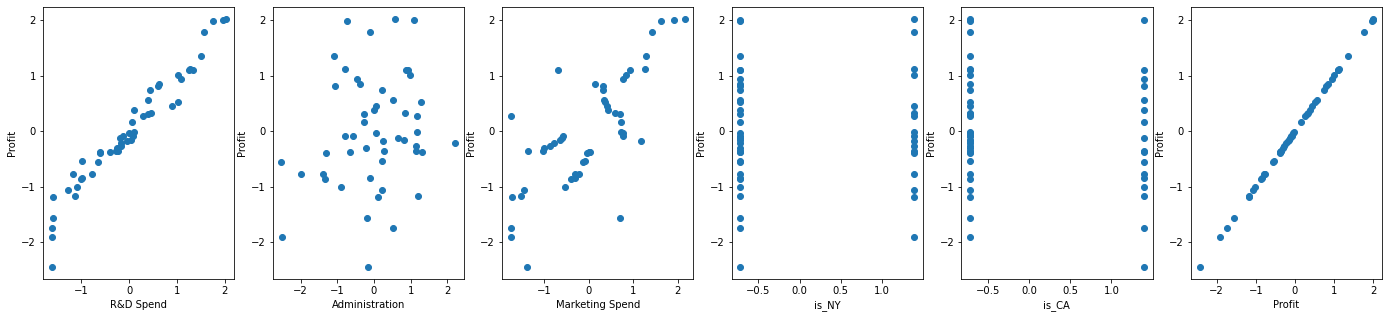

In [225]:
df_plot = df50_model_std
cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA',
       'Profit']

fg, ax = plt.subplots(1, len(cols))
for a, c in zip(ax, cols):
    a.scatter(df_plot[c], df_plot['Profit'])
    a.set_xlabel(c)
    a.set_ylabel('Profit')

fg.set_size_inches(4*len(cols), 5)

In [226]:
df50_model_std['c'] = 1

In [227]:
df50_model_std.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA',
       'Profit', 'c'],
      dtype='object')

In [228]:

X = df50_model_std[['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA','c']].values
Y = df50_model_std['Profit'].values
# print(X, Y)


# Y = df_plot['Profit']
# X = df_plot['Profit']


In [229]:
len(X[0])

6

In [230]:
result, df_iter = lrmle.estimate(Y, X, learning_rate=0.01)

BREAKING: theta is = [ 8.82315637e-01 -6.26015635e-03  1.17303421e-01  5.68998479e-03
  5.08965790e-03  9.57387879e-07]


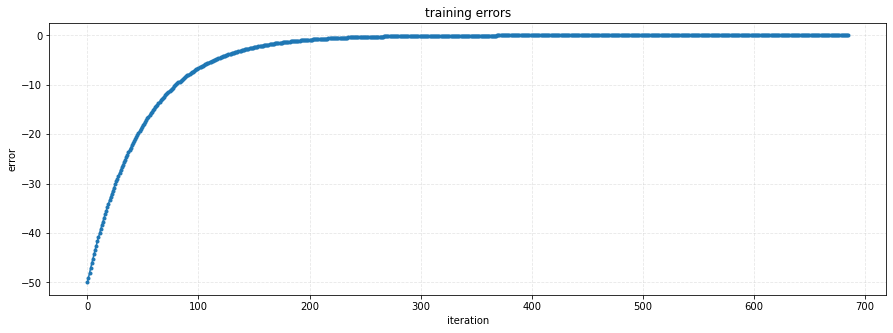

In [231]:
fg, ax = plt.subplots(1,1)
ax.plot(df_iter['ix'], df_iter['err'], marker='.')

_ = ax.grid(linestyle='--', alpha=0.3)
_ = ax.set_xlabel('iteration')
_ = ax.set_ylabel('error')
ax.set_title('training errors')
fg.set_size_inches(15, 5)


In [232]:
result.T

array([ 8.82315637e-01, -6.26015635e-03,  1.17303421e-01,  5.68998479e-03,
        5.08965790e-03,  9.57387879e-07])

In [233]:
y_hat = np.matmul(X, result.T)

In [234]:
lrmle.mae(Y, y_hat), lrmle.mape(Y, y_hat), lrmle.rmse(Y, y_hat)

(0.16176394005424682, 0.5832926844970374, 0.22329332762564505)

In [237]:
Y_raw = df50_model['Profit']
Y_raw_mean = np.mean(Y_raw)
Y_raw_std = np.std(Y_raw)
y_hat_adj = y_hat*Y_raw_std + Y_raw_mean

In [238]:
df_result = pd.DataFrame(
    {
        'Y':Y_raw,
        'y_hat':y_hat_adj
    }
)

In [239]:
df_result['ape']=np.abs(df_result['y_hat']/df_result['Y']-1)
df_result['ae']=np.abs(df_result['y_hat']-df_result['Y'])

In [241]:
mean_absolute_percentage_error(Y_raw, y_hat_adj)

0.10640421420376914

In [ ]:
# df_temp['diff'] = df_temp['Y'] - df_temp['y_hat']
# df_temp['abs_diff'] = np.abs(df_temp['diff'])
# df_temp['pe_abs_diff'] = df_temp['abs_diff']*1.0/df_temp['Y']
# print(f"MAE {np.round(np.mean(df_temp['abs_diff']),2):,}, MAPE={np.round(np.mean(df_temp['pe_abs_diff']),4):.2%}") 
# # df_temp.head(1000)

In [243]:
df_result.head(40).round(4)

,Y,y_hat,ape,ae
0,192261.83,193113.2428,0.0044,851.4128
1,191792.06,189722.4229,0.0108,2069.6371
2,191050.39,181261.8778,0.0512,9788.5122
3,182901.99,173600.7140,0.0509,9301.2760
4,166187.94,170953.7864,0.0287,4765.8464
5,156991.12,163303.3129,0.0402,6312.1929
6,156122.51,155856.4303,0.0017,266.0797
7,155752.60,159681.9362,0.0252,3929.3362
8,152211.77,152100.1997,0.0007,111.5703
9,149759.96,154317.2078,0.0304,4557.2478


In [174]:
np.mean(df_result['ape'])

0.5832926844970374

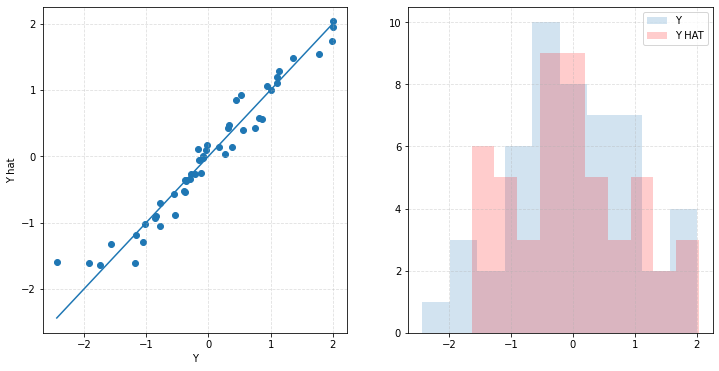

In [176]:
fg, ax = plt.subplots(1,2)
ax[0].scatter(Y, y_hat)

ax[0].set_xlabel('Y')
ax[0].set_ylabel('Y hat')
ax[0].grid(linestyle='--', alpha=0.4)
ax[1].hist(Y,  alpha=0.2, label='Y')
ax[1].hist(y_hat, color='red', alpha=0.2, label='Y HAT')
ax[1].legend()
ax[1].grid(linestyle='--', alpha=0.4)
fg.set_size_inches(6*2,6)

In [244]:
# class LinearRegressionMLE():
#     def __init__(self,x_train,y_train):
#         self.x_train=x_train
#         self.y_train=y_train
#         self.parameters = None

#     def train(self):
#         n= y_train.shape[0]
#         X= self.x_train
#         # MLE weights equation
#         inverse = np.linalg.inv(X.T @ X)
#         weights = (inverse @ X.T).dot(self.y_train)

#         # MLE bias equation
#         bias = 1/n*np.sum(self.y_train- np.dot(X,weights))

#         self.parameters = np.vstack((weights,bias))
#         return self.parameters

#     def predict(self,x_test):
#         weights = self.parameters[0:-1,:]
#         bias = self.parameters[-1,:]
#         return np.dot(x_test,weights) + bias[0]     

# class LinearRegressionMLE_with_reg():
#     def __init__(self,x_train,y_train):
#         self.x_train=x_train
#         self.y_train=y_train
#         self.parameters = None

#     def train(self):
#         n= y_train.shape[0]
#         X= self.x_train
#         # MLE weights equation
#         inverse = np.linalg.inv(X.T @ X)
#         weights = (inverse @ X.T).dot(self.y_train)

#         # MLE bias equation
#         bias = 1/n*np.sum(self.y_train - np.dot(X,weights))

#         self.parameters = np.vstack((weights,bias))
#         return self.parameters

#     def predict(self,x_test):
#         weights = self.parameters[0:-1,:]
#         bias = self.parameters[-1,:]
#         return np.dot(x_test,weights) + bias[0]     


In [ ]:
model =LinearRegressionMLE(X_train,y_train)
parameters = model.train()
weights = parameters[0:-1,:]
bias = parameters[-1,:]
prediction =  model.predict(X_test)
fg, ax = plt.subplots(1,1)
ax.set_title('House area vs Price')
ax.set_xlabel('House area(ft^2)')
ax.set_label('Price($)')
linear_equation = "y={:0.2f}x+{:0.2f}".format(weights[0][0],bias[0])
ax.plot(X_test,prediction,color='k',label=linear_equation)
ax.scatter(X_test,y_test,label='Correct output')
_ = ax.legend()
_ = ax.grid(linestyle='--', alpha=0.3)
# plt.show()